In [124]:
#load the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import os
import seaborn as sns

In [125]:
#import the data
data = pd.read_csv("heart_failure.csv")
pd.set_option('display.max_columns', None)

### Exploratory data analysis EDA

In [126]:
#data exploration
data.columns
#data.info()
#data.describe

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

#### desribe the data, the columns are- 
- age: age of the patient
- anemia: whether the patient has anememia [1: yes, 0: no]
- creatinine_phosphokinase: level of the CPK enzyme in the blood, Units: mcg/L, normal range: 10 to 120 mcg/L
- diabetes: whether the patient has diabetes [1: yes, 0: no]
- ejection_fraction: percentage of blood leaving the heart at each contraction, normal 55% to 70%
- high_blood_pressure: whether the patient has hypertention [1: yes, 0: no]
- platelets: number of platelets in the blood (kiloplatelets/mL), normal 150,000 - 450,000 kiloplatelets/ml
- serum_creatinine: level of creatinine in the blood (mg/dL), normal man 0.7 to 1.3 mg/dL, woman 0.6-1.1 mg/dL
- serum_sodium: level of serum sodium in the blood (mEq/L), 145 mM (or 145 mEq/L)
- sex: woman or man (binary)
- smoking: whether the patient smokes [1: yes, 0: no]
- time: follow-up period in days
- DEATH_EVENT: whether the patient deceased during the follow-up period [1: yes, 0: no]


In [127]:
#convert columns with  0,1 data into categorical data

data.anaemia = data.anaemia.astype("category")
data.diabetes = data.diabetes.astype("category")
data.high_blood_pressure = data.high_blood_pressure.astype("category")
data.sex = data.sex.astype("category")
data.smoking = data.smoking.astype("category")
data.DEATH_EVENT = data.DEATH_EVENT.astype("category")

In [128]:
import os
#if there is not table_report.txt file, create it
if not os.path.exists("table_report.txt"):
    with open("table_report.txt", "w") as report:
        report.write("Table Report for Heart Failure Dataset\n")
        report.write("=" * 40 + "\n\n")
        
        # Dataset shape
        report.write(f"Number of Rows: {data.shape[0]}\n")
        report.write(f"Number of Columns: {data.shape[1]}\n\n")
        
        # Column names
        report.write("Column Names:\n")
        for col in data.columns:
            report.write(f"- {col}\n")
        
        # Data types
        report.write("\nData Types:\n")
        report.write(data.dtypes.to_string())
        
        # Missing values
        report.write("\n\nMissing Values:\n")
        missing = data.isnull().sum()
        if missing.sum() == 0:
            report.write("There are no missing values in the dataset.\n")
        else:
            for col, count in missing.items():
                if count > 0:
                    report.write(f"{col}: {count} missing values\n")
    
        print(f"Report saved to: {report}")

In [129]:
# Check for duplicates

with open("table_report.txt", "a") as report:
    report.write("\n\nDuplicate Rows:\n")
    duplicate_count = data.duplicated().sum()
    if duplicate_count > 0:
        report.write(f"There are {duplicate_count} duplicate rows in the dataset.\n")
    else:
        report.write("There are no duplicate rows in the dataset.\n")

In [130]:
data.info()
#data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   age                       299 non-null    float64 
 1   anaemia                   299 non-null    category
 2   creatinine_phosphokinase  299 non-null    int64   
 3   diabetes                  299 non-null    category
 4   ejection_fraction         299 non-null    int64   
 5   high_blood_pressure       299 non-null    category
 6   platelets                 299 non-null    float64 
 7   serum_creatinine          299 non-null    float64 
 8   serum_sodium              299 non-null    int64   
 9   sex                       299 non-null    category
 10  smoking                   299 non-null    category
 11  time                      299 non-null    int64   
 12  DEATH_EVENT               299 non-null    category
dtypes: category(6), float64(3), int64(4)
memory usage:

In [131]:
# Identify the outliers using the IQR method, but apply only for numerical columns
# Filter numerical columns with float64 and int64 types
numerical_columns = data.select_dtypes(include=["float64", "int64"]).columns

# Calculate IQR for numerical columns
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1



# Identify outliers in numerical columns
threshold = 3

outliers = data[((data[numerical_columns] < (Q1 - threshold * IQR)) | (data[numerical_columns] > (Q3 + threshold * IQR))).any(axis=1)]
if not outliers.empty:
    print(f"Number of outliers detected: {len(outliers)}")
    print("Outliers:")
    print(outliers)

#remove the outliers from the data
data_cleaned = data[~((data[numerical_columns] < (Q1 - threshold * IQR)) | (data[numerical_columns] > (Q3 + threshold * IQR))).any(axis=1)]

with open("table_report.txt", "a") as report:
    report.write("\n\nOutliers Report:\n")

    report.write("There are 37 outliers in the datasets when I use the threshold of 3.\n")

Number of outliers detected: 37
Outliers:
      age anaemia  creatinine_phosphokinase diabetes  ejection_fraction  \
1    55.0       0                      7861        0                 38   
9    80.0       1                       123        0                 35   
10   75.0       1                        81        0                 38   
28   58.0       1                        60        0                 38   
31   85.0       0                        23        0                 45   
35   69.0       0                       582        1                 35   
38   60.0       0                      2656        1                 30   
39   60.0       0                       235        1                 38   
48   80.0       1                       553        0                 20   
52   60.0       0                      3964        1                 62   
60   45.0       0                      7702        1                 25   
65   60.0       0                        68        0      

### Univariate Analysis
look at distributions of numerical variables and frequency of categorical variables.

<Figure size 1800x1200 with 0 Axes>

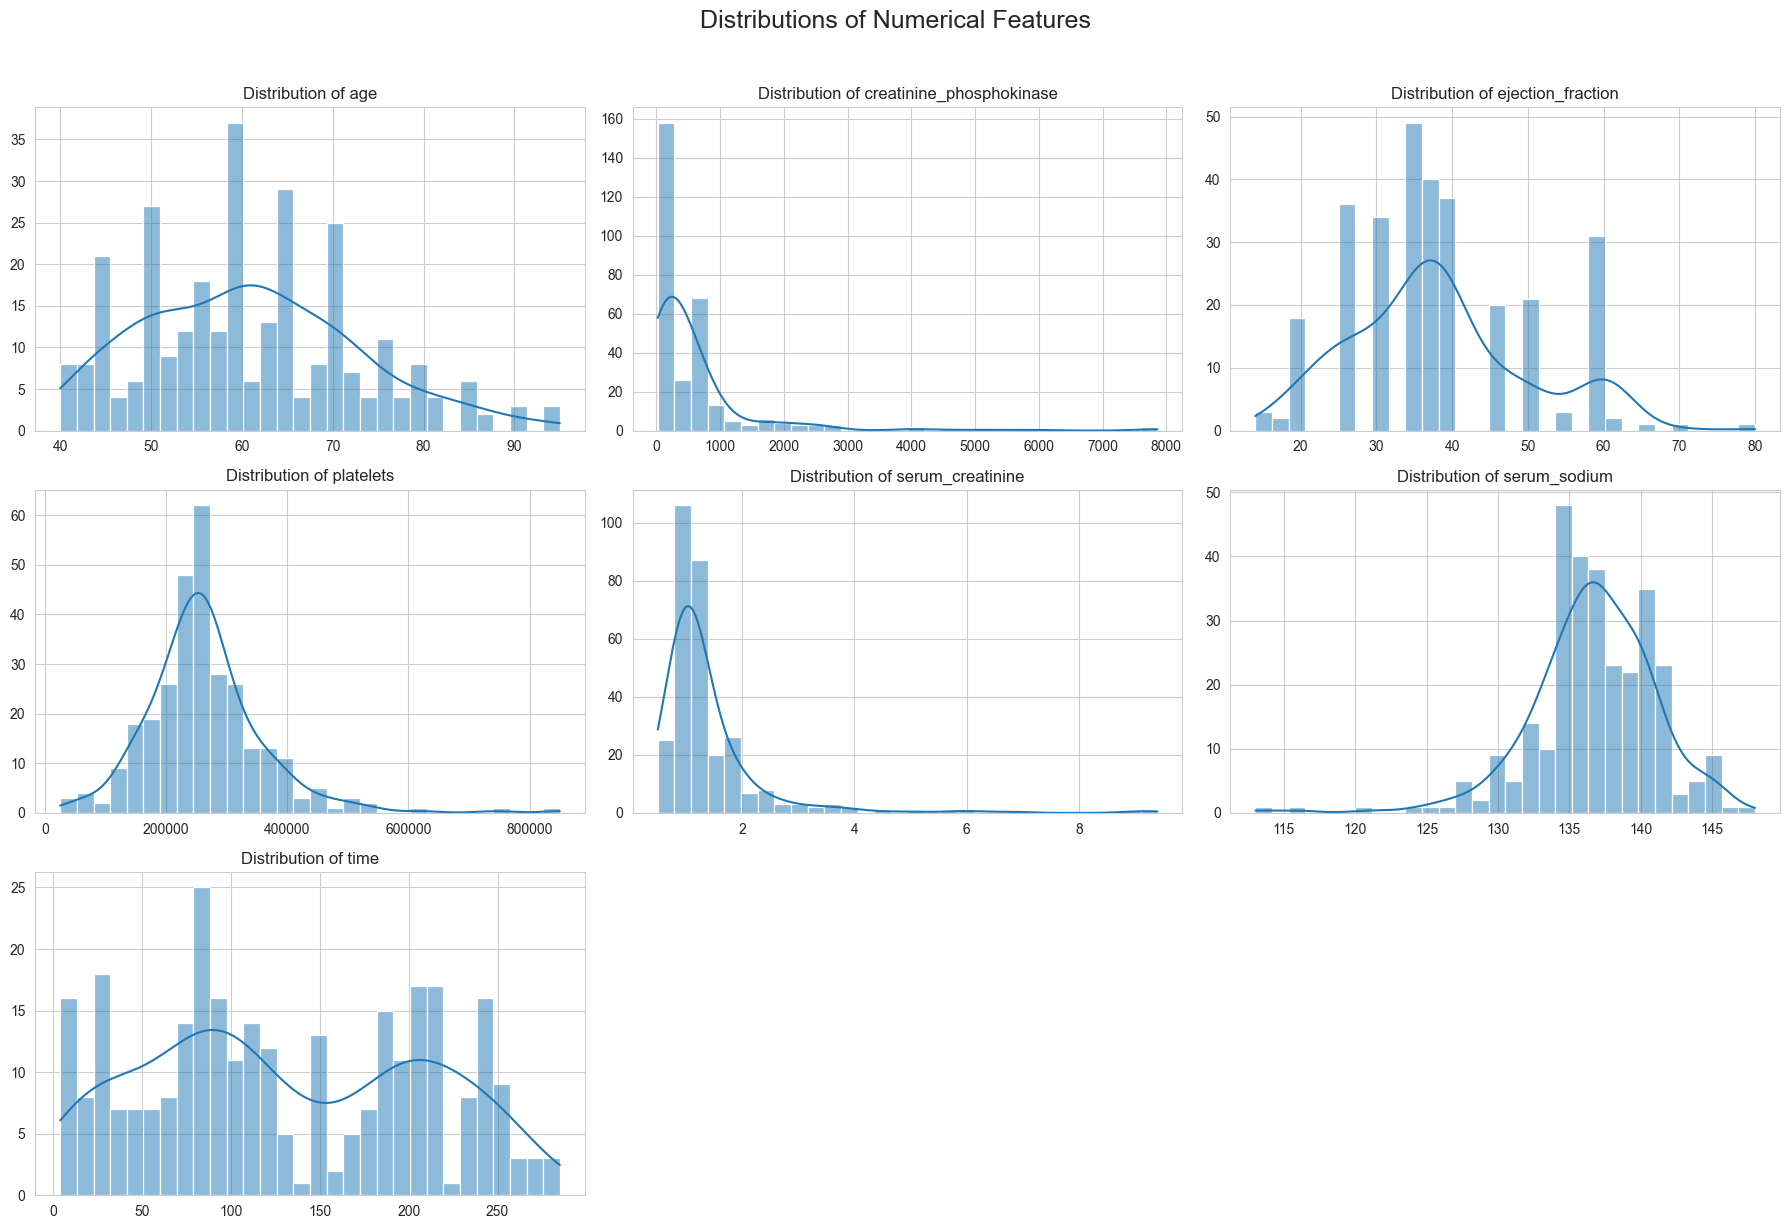

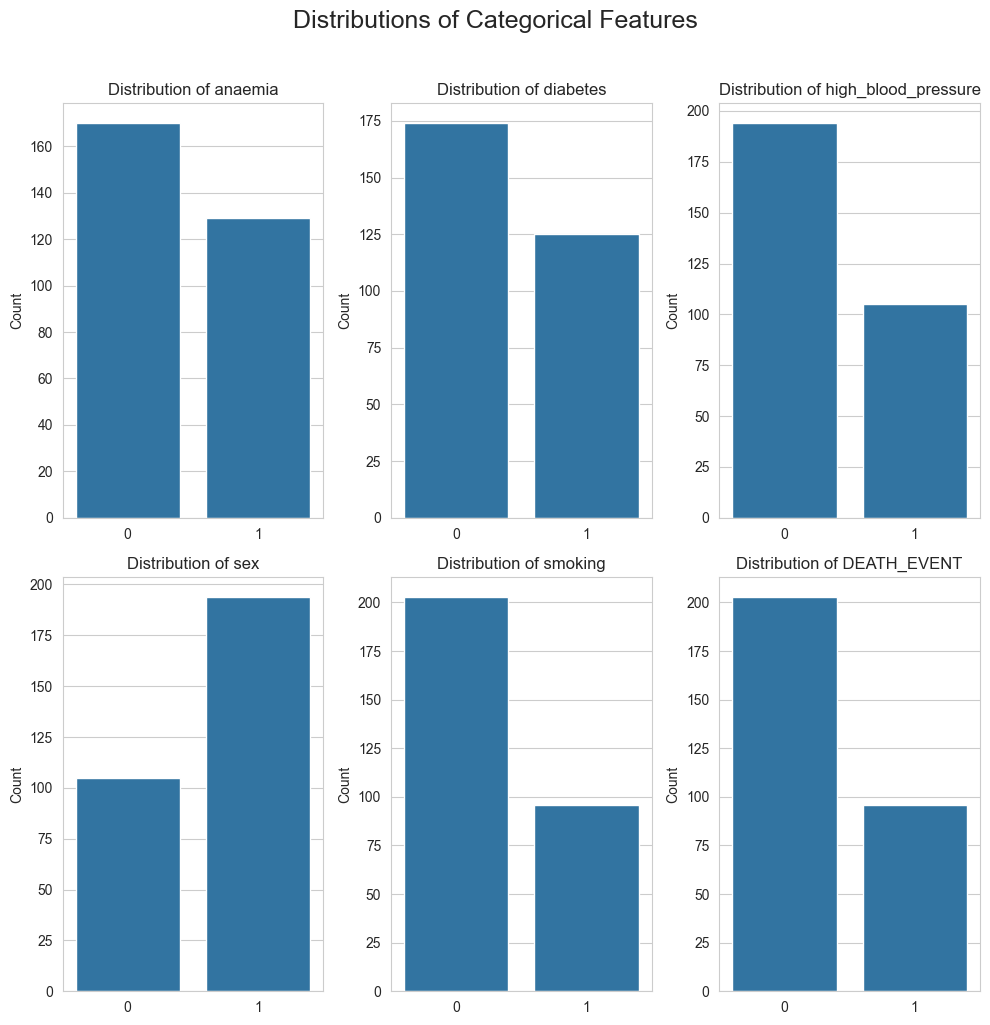

In [132]:
#plot the distributions of numerical and categorical features ans# save the plots in the folder plots
output_folder = "plots"
numerical = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(18, 12))  # Adjust figure size as needed

# Create a 3x3 grid (only 7 used)
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()  # Convert 2D array of axes to 1D

for i, col in enumerate(numerical):
    sns.histplot(data[col], kde=True, ax=axes[i], bins=30)
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

# Hide unused subplots (positions 7 and 8 in the grid)
for j in range(len(numerical), len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Distributions of Numerical Features", fontsize=18, y=1.02)
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "numerical_distributions.png"))
plt.show()


categorical = data.select_dtypes(include="category").columns.tolist()

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))
axes = axes.flatten()  # Convert 2D array of axes to 1D
for i, col in enumerate(categorical):
    sns.countplot(x = col, data = data, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel("Count")
# Hide any unused subplots (if < 6 categorical columns)
for j in range(len(categorical), len(axes)):
    fig.delaxes(axes[j])
fig.suptitle("Distributions of Categorical Features", fontsize=18, y=1.02)
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "categorical_distributions.png"))
plt.show()


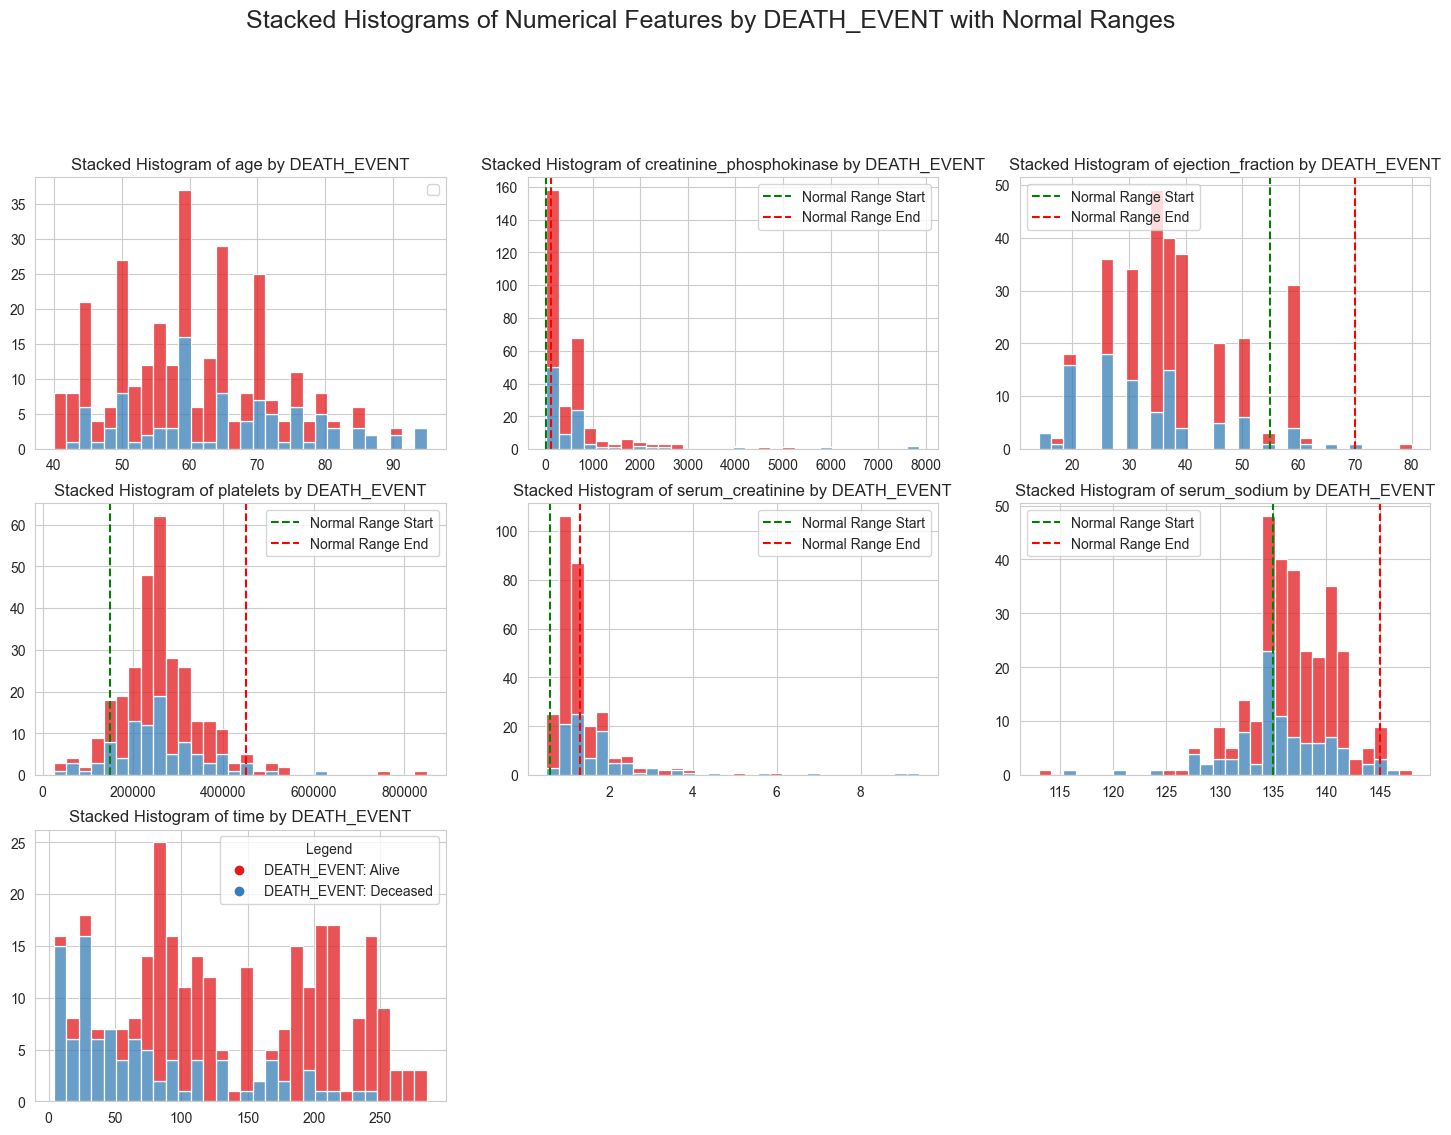

<Figure size 1800x1200 with 0 Axes>

In [133]:
# Define normal ranges for the features
# Plot stacked histograms for numerical features with DEATH_EVENT as the hue and include normal ranges
# Add a legend for the DEATH_EVENT color

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
axes = axes.flatten()

normal_ranges = {
    "age": (None, None),  # No specific normal range for age
    "creatinine_phosphokinase": (10, 120),  # Normal range in mcg/L
    "ejection_fraction": (55, 70),  # Normal range in percentage
    "platelets": (150000, 450000),  # Normal range in kiloplatelets/mL
    "serum_creatinine": (0.6, 1.3),  # Normal range in mg/dL
    "serum_sodium": (135, 145),  # Normal range in mEq/L
    "time": (None, None)  # No specific normal range for time
}

for i, col in enumerate(numerical):
    sns.histplot(data, x=col, hue="DEATH_EVENT", multiple="stack", ax=axes[i], bins=30, palette="Set1")
    axes[i].set_title(f'Stacked Histogram of {col} by DEATH_EVENT')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

    # Overlay normal range if defined
    if col in normal_ranges and normal_ranges[col][0] is not None:
        axes[i].axvline(normal_ranges[col][0], color='green', linestyle='--', label='Normal Range Start')
    if col in normal_ranges and normal_ranges[col][1] is not None:
        axes[i].axvline(normal_ranges[col][1], color='red', linestyle='--', label='Normal Range End')

    axes[i].legend()

# Hide unused subplots
for j in range(len(numerical), len(axes)):
    fig.delaxes(axes[j])

legend_labels = {0: "Alive", 1: "Deceased"}
for label in legend_labels:
    plt.scatter([], [], color=sns.color_palette("Set1")[label], label=f"DEATH_EVENT: {legend_labels[label]}")
plt.legend(title="Legend", loc="upper right")
plt.figure(figsize=(18, 12))

fig.suptitle("Stacked Histograms of Numerical Features by DEATH_EVENT with Normal Ranges", fontsize=18, y=1.02)
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "stacked_histograms_with_normal_ranges.png"))
plt.show()

Plot summary: 
- red is alive, blue is deceased
- creatinine phosphokinase: there are many patients whose CP values are out of the normal range. 
- ejection fraction: many patients have low EF, probably there is heart insufficiency, heart can not eject enough blood to sustain normal blood circulation. 
- platelets: the distribution looks normal, and there almost 50/50 with death outcome. 
- serum_creatinine: there is a big amount of patients whose SCK is outside of the normal range. Interestingly there is huge amount of people who deceased regardless of the normal value of the serum creatinine. same is for the serum-sodium. Sodium ion (Na+) is very important for action potential, which let a muscle to contract in the case of the heart attack issue in this data set it might not play a huge role to prediction. 

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


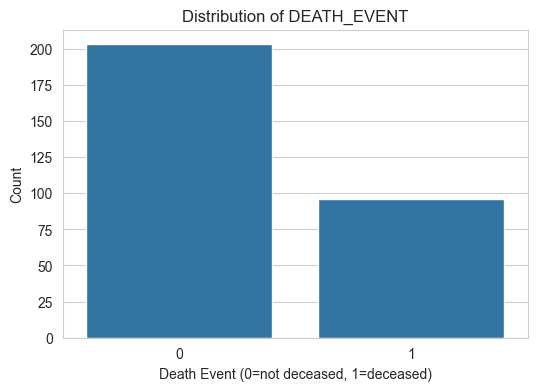


Death Event Distribution:
DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


In [134]:
# what is the distibution of the death event in the dataset?

death_event_distribution = data["DEATH_EVENT"].value_counts()
print(death_event_distribution)

with open("table_report.txt", "a") as report:
    report.write("\n\nDeath Event Distribution:\n")
    report.write(f"\n{death_event_distribution.to_string()}\n")
    report.write("There is uneven distribution of the death event in the dataset.\n")


death_counts = data['DEATH_EVENT'].value_counts()
plt.figure(figsize=(6, 4))
sns.countplot(x='DEATH_EVENT', data=data)
plt.title("Distribution of DEATH_EVENT")
plt.xlabel("Death Event (0=not deceased, 1=deceased)")
plt.ylabel("Count")
plt.show()
print("\nDeath Event Distribution:")
print(death_counts)

- we see here a class imblalance, since there are 203 patients who are not deceased and 96 deceased during follow-up. This can influence later the model performance. 

### Correlation analysis

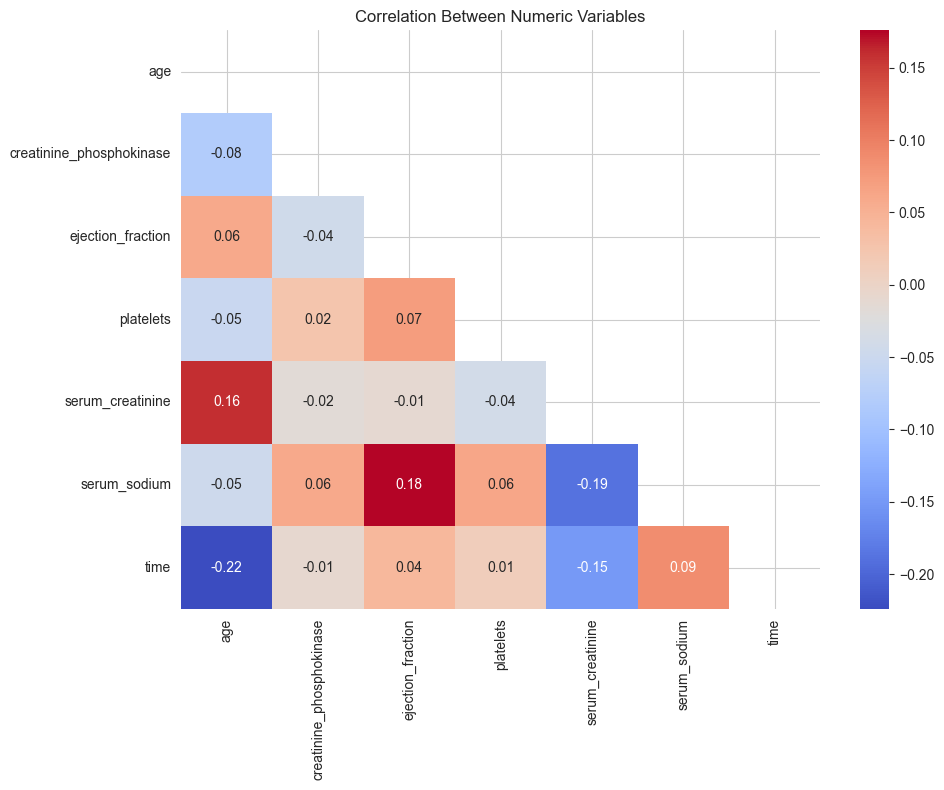

In [135]:
## Correlation matrix for numerical features
output_folder = "plots"
corr = data.corr(numeric_only=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", mask=mask)
plt.title("Correlation Between Numeric Variables")
plt.tight_layout()
filepath = os.path.join(output_folder, "correlation_matrix.png")
plt.savefig(filepath, dpi = 300, bbox_inches = "tight")
plt.show()



- There is no strong correlation between the numerich variables

               Feature  Chi2 score       p_value
5          DEATH_EVENT  203.000000  4.625817e-46
2  high_blood_pressure    1.221539  2.690589e-01
0              anaemia    0.746593  3.875569e-01
4              smoking    0.032347  8.572686e-01
3                  sex    0.001956  9.647213e-01
1             diabetes    0.000657  9.795537e-01


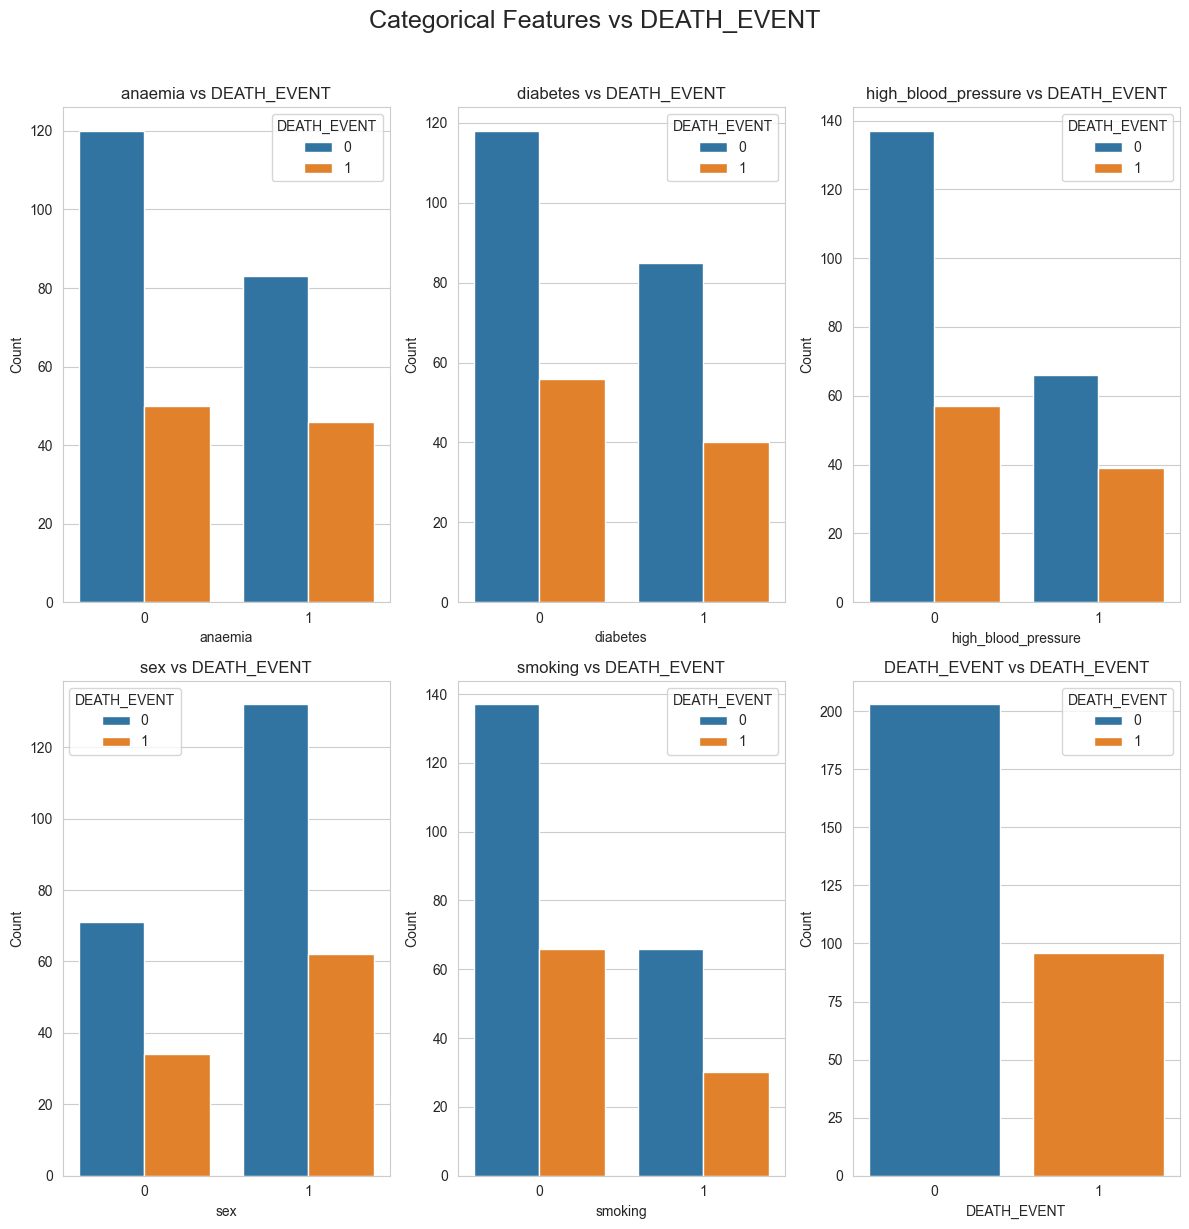

In [136]:
# CATEGORICAL DATA 

# chi-square for categorical features

from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest

X = data.iloc[:,:-1].values
X = data.select_dtypes(include=["category"])
y = data["DEATH_EVENT"]


#for chi2, features must be non-negative (usually integers)
X_encoded = X.copy()
for col in X_encoded.columns:
    if X_encoded[col].dtype == "category":
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(X_encoded[col])

chi_scores = chi2(X_encoded, y)
chi_data = pd.DataFrame({"Feature":X.columns, "Chi2 score": chi_scores[0], "p_value" : chi_scores[1]})
print(chi_data.sort_values(by = "Chi2 score", ascending=False))



#### non of the features is statistically dependent from the target feature (nor numeric neither categorical)

# Visualize categorical vs. DEATH_EVENT
candidates = data.select_dtypes(include=["category"]).columns.tolist()
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(12, 12))
axes = axes.flatten()  # Convert 2D array of axes to 1D
for i, col in enumerate(candidates):
    sns.countplot(x=col, hue="DEATH_EVENT", data=data, ax = axes[i])
    axes[i].set_title(f"{col} vs DEATH_EVENT")
    axes[i].set_ylabel("Count")
# Save the plots in the output folder
fig.suptitle("Categorical Features vs DEATH_EVENT", fontsize=18, y=1.02)
plt.tight_layout()
plt.savefig(os.path.join(output_folder, "categorical_vs_DEATH_EVENT.png"))
plt.show()

# Save the chi-square results to the report
with open("table_report.txt", "a") as report:
    report.write("\n\nChi-Square Results for Categorical Features:\n")
    report.write(chi_data.to_string(index=False))
    report.write("\n\nVisualizations of Categorical Features vs DEATH_EVENT saved in the 'plots' folder.\n")



### Bivariate Analysis

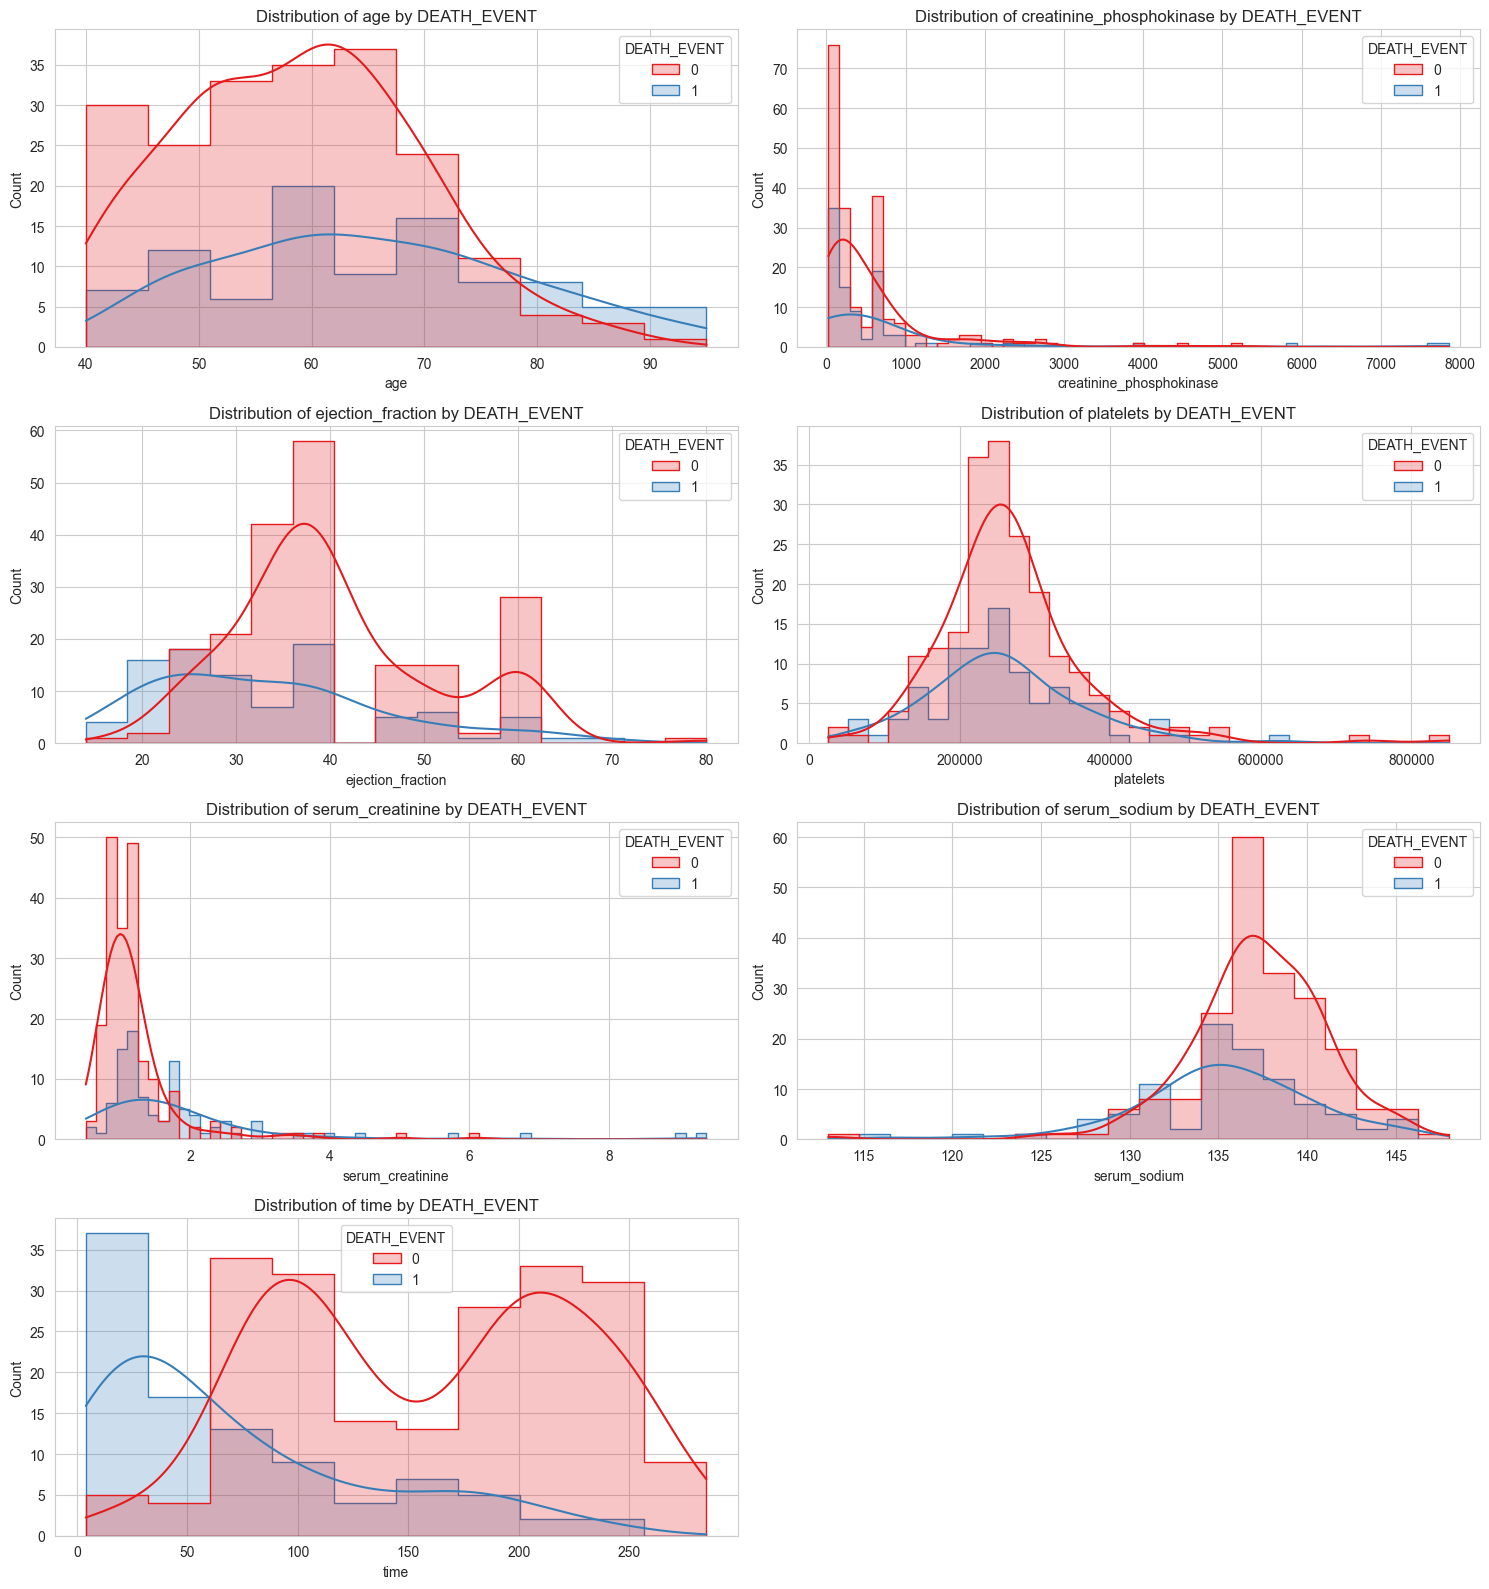

In [137]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

ouput_folder = "plots"

def plot_eda_distributions(data, target='DEATH_EVENT'):
    """
    Plot histograms with KDEs for all numerical features in the dataset,
    colored by the binary target variable.

    Parameters:
    - data: pandas DataFrame containing the dataset.
    - target: name of the binary target column to color by (default: 'DEATH_EVENT').
    """
    # Set plotting style
    sns.set_style(style="whitegrid")

    # Identify numerical columns excluding the target
    numerical_cols = data.select_dtypes(include=['float64', 'int64']).columns
    num_features = len(numerical_cols)

    # Calculate rows and columns for subplots
    n_cols = 2
    n_rows = (num_features + 1) // n_cols

    # Create subplots
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(15, 4 * n_rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_cols):
        sns.histplot(data, x=col, kde=True, hue=target, ax=axes[i], palette="Set1", element="step")
        axes[i].set_title(f"Distribution of {col} by {target}")

    # Remove any extra axes
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()

    filepath = os.path.join(ouput_folder, "variables versus death event.png")
    plt.savefig(filepath, dpi = 300, bbox_inches = "tight")
    plt.show()

plot_eda_distributions(data, target='DEATH_EVENT')

### Data Preprocessing

- We need to preprocess the data, some steps are done above. The preprocessing step is crucial before we feed the data into Machine learning model. (The major steps are: handling null values-in case of sparing data use SimpleInputer from sklearn, future scaling - what is scaling? what is doen is scaling? what is standardization and what is normalization?, handling categorical values.)

#### scaling using StandardScaler
-  data is scaled around the mean with a unit stanard deviation. The mean becomes zero and the data points are distibuted around it. 
- I use the standardScaler because it can be useful regardles if the data follows the Gaussian distribution or not, there is a also a scaler called RobustScaler which scales data between the 1st and 3rd quartile, also called IQR and it is robust to outliers. 


In [138]:
from sklearn.preprocessing import StandardScaler

# Select numerical columns
numerical_columns = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

# Initialize RobustScaler
scaler = StandardScaler()

# Scale the numerical data
scaled_data = scaler.fit_transform(data[numerical_columns])

# Create a new DataFrame with scaled data
scaled_df = pd.DataFrame(scaled_data, columns=numerical_columns)

# Combine scaled numerical data with categorical data
norm_data = pd.concat([scaled_df, data[categorical]], axis=1)

# Display the first few rows of the normalized data
print(norm_data.head())

        age  creatinine_phosphokinase  ejection_fraction     platelets  \
0  1.192945                  0.000166          -1.530560  1.681648e-02   
1 -0.491279                  7.514640          -0.007077  7.535660e-09   
2  0.350833                 -0.449939          -1.530560 -1.038073e+00   
3 -0.912335                 -0.486071          -1.530560 -5.464741e-01   
4  0.350833                 -0.435486          -1.530560  6.517986e-01   

   serum_creatinine  serum_sodium      time anaemia diabetes  \
0          0.490057     -1.504036 -1.629502       0        0   
1         -0.284552     -0.141976 -1.603691       0        0   
2         -0.090900     -1.731046 -1.590785       0        0   
3          0.490057      0.085034 -1.590785       1        0   
4          1.264666     -4.682176 -1.577879       1        1   

  high_blood_pressure sex smoking DEATH_EVENT  
0                   1   1       0           1  
1                   0   1       0           1  
2                   0   1 

#### Here is robust scaler, the output of which will not be used in further steps. 

In [139]:
''' [markdown]
Heart_attack.ipynbfrom sklearn.preprocessing import RobustScaler

# Initialize RobustScaler
robust_scaler = RobustScaler()

# Scale the numerical data
robust_scaled_data = robust_scaler.fit_transform(data[numerical_columns])

# Create a new DataFrame with scaled data
robust_scaled_df = pd.DataFrame(robust_scaled_data, columns=numerical_columns)

# Combine scaled numerical data with categorical data
robust_norm_data = pd.concat([robust_scaled_df, data[categorical]], axis=1)

# Display the first few rows of the robustly scaled data
print(robust_norm_data.head())
'''

' [markdown]\nHeart_attack.ipynbfrom sklearn.preprocessing import RobustScaler\n\n# Initialize RobustScaler\nrobust_scaler = RobustScaler()\n\n# Scale the numerical data\nrobust_scaled_data = robust_scaler.fit_transform(data[numerical_columns])\n\n# Create a new DataFrame with scaled data\nrobust_scaled_df = pd.DataFrame(robust_scaled_data, columns=numerical_columns)\n\n# Combine scaled numerical data with categorical data\nrobust_norm_data = pd.concat([robust_scaled_df, data[categorical]], axis=1)\n\n# Display the first few rows of the robustly scaled data\nprint(robust_norm_data.head())\n'

In [140]:
norm_data.shape
cat_columns = norm_data.select_dtypes(include="category")

for c in cat_columns:
    print(f"Count value for the columns {c}\n")

    print(cat_columns[c].value_counts())

Count value for the columns anaemia

anaemia
0    170
1    129
Name: count, dtype: int64
Count value for the columns diabetes

diabetes
0    174
1    125
Name: count, dtype: int64
Count value for the columns high_blood_pressure

high_blood_pressure
0    194
1    105
Name: count, dtype: int64
Count value for the columns sex

sex
1    194
0    105
Name: count, dtype: int64
Count value for the columns smoking

smoking
0    203
1     96
Name: count, dtype: int64
Count value for the columns DEATH_EVENT

DEATH_EVENT
0    203
1     96
Name: count, dtype: int64


In [141]:
### ----- Label Encoding Categorical Variables -----

from sklearn.preprocessing import LabelEncoder


df_tree = norm_data.copy()
categorical = df_tree.select_dtypes(include="category").columns

for col in categorical:
    if col != "DEATH_EVENT":  # Don't encode the target
        df_tree[col] = LabelEncoder().fit_transform(df_tree[col])

df_tree.head()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time,anaemia,diabetes,high_blood_pressure,sex,smoking,DEATH_EVENT
0,1.192945,0.000166,-1.530560,1.681648e-02,0.490057,-1.504036,-1.629502,0,0,1,1,0,1
1,-0.491279,7.514640,-0.007077,7.535660e-09,-0.284552,-0.141976,-1.603691,0,0,0,1,0,1
2,0.350833,-0.449939,-1.530560,-1.038073e+00,-0.090900,-1.731046,-1.590785,0,0,0,1,1,1
3,-0.912335,-0.486071,-1.530560,-5.464741e-01,0.490057,0.085034,-1.590785,1,0,0,1,0,1
4,0.350833,-0.435486,-1.530560,6.517986e-01,1.264666,-4.682176,-1.577879,1,1,0,0,0,1


In [142]:
from sklearn.preprocessing import OneHotEncoder
# Apply OneHotEncoder to categorical columns

# target column should not be encoded and therefore we will drop it
categorical = [col for col in norm_data.columns if col != 'DEATH_EVENT' and norm_data[col].dtype == 'category']
encoder = OneHotEncoder(sparse_output=False, drop='first')  # Drop first to avoid multicollinearity
encoded_categorical = encoder.fit_transform(norm_data[categorical])

# Convert encoded data to a DataFrame
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical))

# Combine encoded categorical data with numerical data
df_non_tree = pd.concat([norm_data[numerical_columns], encoded_df], axis=1)

#concatenate the target column
df_non_tree = pd.concat([df_non_tree, norm_data['DEATH_EVENT']], axis=1)


# Display the first few rows of the final dataset
print(df_non_tree.head())


        age  creatinine_phosphokinase  ejection_fraction     platelets  \
0  1.192945                  0.000166          -1.530560  1.681648e-02   
1 -0.491279                  7.514640          -0.007077  7.535660e-09   
2  0.350833                 -0.449939          -1.530560 -1.038073e+00   
3 -0.912335                 -0.486071          -1.530560 -5.464741e-01   
4  0.350833                 -0.435486          -1.530560  6.517986e-01   

   serum_creatinine  serum_sodium      time  anaemia_1  diabetes_1  \
0          0.490057     -1.504036 -1.629502        0.0         0.0   
1         -0.284552     -0.141976 -1.603691        0.0         0.0   
2         -0.090900     -1.731046 -1.590785        0.0         0.0   
3          0.490057      0.085034 -1.590785        1.0         0.0   
4          1.264666     -4.682176 -1.577879        1.0         1.0   

   high_blood_pressure_1  sex_1  smoking_1 DEATH_EVENT  
0                    1.0    1.0        0.0           1  
1                   

#### Training Machine learning model: Non-tree based algorithms
- logistic regression: is a calculation to predict a binary outcome. P(Y=1|X) or P(Y=0|X), It calculates the probability of dependent variable Y, given independent variable X
- 



In [143]:
df_non_tree.columns

Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time', 'anaemia_1', 'diabetes_1',
       'high_blood_pressure_1', 'sex_1', 'smoking_1', 'DEATH_EVENT'],
      dtype='object')

In [144]:
target = "DEATH_EVENT"
feature_col_non_tree = df_non_tree.columns.tolist()
feature_col_non_tree.remove(target)

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score
from sklearn.preprocessing import RobustScaler,MinMaxScaler,StandardScaler
acc_log=[]

kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_non_tree,y=y)):
    
    X_train=df_non_tree.loc[trn_,feature_col_non_tree]
    y_train=df_non_tree.loc[trn_,target]
    
    X_valid=df_non_tree.loc[val_,feature_col_non_tree]
    y_valid=df_non_tree.loc[val_,target]
    
    #print(pd.DataFrame(X_valid).head())
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    
    clf=LogisticRegression()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_log.append(acc)
    print(f"The accuracy for Fold {fold+1} : {acc}")
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.96      0.55      0.70        40
           1       0.51      0.95      0.67        20

    accuracy                           0.68        60
   macro avg       0.74      0.75      0.68        60
weighted avg       0.81      0.68      0.69        60

The accuracy for Fold 1 : 0.75
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.90      0.93      0.92        41
           1       0.83      0.79      0.81        19

    accuracy                           0.88        60
   macro avg       0.87      0.86      0.86        60
weighted avg       0.88      0.88      0.88        60

The accuracy for Fold 2 : 0.8581514762516047
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        41
           1       1.00      0.63      0.77        19

    accuracy                           0.88      

In [145]:
### using Naive Bayes

from sklearn.naive_bayes import GaussianNB
acc_Gauss=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_non_tree,y=y)):
    
    X_train=df_non_tree.loc[trn_,feature_col_non_tree]
    y_train=df_non_tree.loc[trn_,target]
    
    X_valid=df_non_tree.loc[val_,feature_col_non_tree]
    y_valid=df_non_tree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=GaussianNB()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Gauss.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       1.00      0.68      0.81        40
           1       0.61      1.00      0.75        20

    accuracy                           0.78        60
   macro avg       0.80      0.84      0.78        60
weighted avg       0.87      0.78      0.79        60

The accuracy for 1 : 0.8375
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        41
           1       0.71      0.63      0.67        19

    accuracy                           0.80        60
   macro avg       0.77      0.75      0.76        60
weighted avg       0.80      0.80      0.80        60

The accuracy for 2 : 0.7548138639281129
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.81      0.93      0.86        41
           1       0.77      0.53      0.62        19

    accuracy                           0.80        60
   

#### Using SVM (support vector machines)

uses algorithms to train and classify data within degrees of polarity, taking it to a degree beyond X/Y prediction.

We need to choose the best Kernel according to our need.

- The linear kernel is mostly preferred for text classification problems as it performs well for large datasets.
- Gaussian kernels tend to give good results when there is no additional information regarding data that is not available.
- Rbf kernel is also a kind of Gaussian kernel which projects the high dimensional data and then searches a linear separation for it.
- Polynomial kernels give good results for problems where all the training data is normalized.


In [146]:
# Using Linear Kernel
from sklearn.svm import SVC
acc_svm=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_non_tree,y=y)):
    
    X_train=df_non_tree.loc[trn_,feature_col_non_tree]
    y_train=df_non_tree.loc[trn_,target]
    
    X_valid=df_non_tree.loc[val_,feature_col_non_tree]
    y_valid=df_non_tree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="linear")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       1.00      0.47      0.64        40
           1       0.49      1.00      0.66        20

    accuracy                           0.65        60
   macro avg       0.74      0.74      0.65        60
weighted avg       0.83      0.65      0.65        60

The accuracy for 1 : 0.7375
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        41
           1       0.61      0.74      0.67        19

    accuracy                           0.77        60
   macro avg       0.74      0.76      0.74        60
weighted avg       0.78      0.77      0.77        60

The accuracy for 2 : 0.7586649550706034
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.87      1.00      0.93        41
           1       1.00      0.68      0.81        19

    accuracy                           0.90        60
   

In [147]:
## Using Sigmoid Kernel
from sklearn.svm import SVC
acc_svm_sig=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_non_tree,y=y)):
    
    X_train=df_non_tree.loc[trn_,feature_col_non_tree]
    y_train=df_non_tree.loc[trn_,target]
    
    X_valid=df_non_tree.loc[val_,feature_col_non_tree]
    y_valid=df_non_tree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="sigmoid")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_sig.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.72      0.72      0.72        40
           1       0.45      0.45      0.45        20

    accuracy                           0.63        60
   macro avg       0.59      0.59      0.59        60
weighted avg       0.63      0.63      0.63        60

The accuracy for 1 : 0.5875
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.76      0.78      0.77        41
           1       0.50      0.47      0.49        19

    accuracy                           0.68        60
   macro avg       0.63      0.63      0.63        60
weighted avg       0.68      0.68      0.68        60

The accuracy for 2 : 0.6270860077021823
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.73      0.90      0.80        41
           1       0.56      0.26      0.36        19

    accuracy                           0.70        60
   

In [148]:
## Using RBF kernel
from sklearn.svm import SVC
acc_svm_rbf=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_non_tree,y=y)):
    
    X_train=df_non_tree.loc[trn_,feature_col_non_tree]
    y_train=df_non_tree.loc[trn_,target]
    
    X_valid=df_non_tree.loc[val_,feature_col_non_tree]
    y_valid=df_non_tree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="rbf")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_rbf.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.96      0.65      0.78        40
           1       0.58      0.95      0.72        20

    accuracy                           0.75        60
   macro avg       0.77      0.80      0.75        60
weighted avg       0.83      0.75      0.76        60

The accuracy for 1 : 0.8
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.84      0.88      0.86        41
           1       0.71      0.63      0.67        19

    accuracy                           0.80        60
   macro avg       0.77      0.75      0.76        60
weighted avg       0.80      0.80      0.80        60

The accuracy for 2 : 0.7548138639281129
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.80      0.95      0.87        41
           1       0.82      0.47      0.60        19

    accuracy                           0.80        60
   mac

In [149]:
## Using RBF kernel
from sklearn.svm import SVC
acc_svm_poly=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_non_tree,y=y)):
    
    X_train=df_non_tree.loc[trn_,feature_col_non_tree]
    y_train=df_non_tree.loc[trn_,target]
    
    X_valid=df_non_tree.loc[val_,feature_col_non_tree]
    y_valid=df_non_tree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=SVC(kernel="poly")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_svm_poly.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       1.00      0.45      0.62        40
           1       0.48      1.00      0.65        20

    accuracy                           0.63        60
   macro avg       0.74      0.72      0.63        60
weighted avg       0.83      0.63      0.63        60

The accuracy for 1 : 0.725
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.89      0.80      0.85        41
           1       0.65      0.79      0.71        19

    accuracy                           0.80        60
   macro avg       0.77      0.80      0.78        60
weighted avg       0.82      0.80      0.80        60

The accuracy for 2 : 0.7971758664955071
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.60      0.63      0.62        19

    accuracy                           0.75        60
   m

In [150]:
## Using RBF kernel
from sklearn.neighbors import KNeighborsClassifier
acc_KNN=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_non_tree,y=y)):
    
    X_train=df_non_tree.loc[trn_,feature_col_non_tree]
    y_train=df_non_tree.loc[trn_,target]
    
    X_valid=df_non_tree.loc[val_,feature_col_non_tree]
    y_valid=df_non_tree.loc[val_,target]
    
    ro_scaler=MinMaxScaler()
    X_train=ro_scaler.fit_transform(X_train)
    X_valid=ro_scaler.transform(X_valid)
    
    clf=KNeighborsClassifier(n_neighbors=32)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_KNN.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")
    
    pass

The fold is : 0 : 
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        40
           1       1.00      0.05      0.10        20

    accuracy                           0.68        60
   macro avg       0.84      0.53      0.45        60
weighted avg       0.79      0.68      0.57        60

The accuracy for 1 : 0.525
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.70      0.98      0.82        41
           1       0.67      0.11      0.18        19

    accuracy                           0.70        60
   macro avg       0.68      0.54      0.50        60
weighted avg       0.69      0.70      0.62        60

The accuracy for 2 : 0.5404364569961488
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.71      1.00      0.83        41
           1       1.00      0.11      0.19        19

    accuracy                           0.72        60
   m

### Using Decision tree classifier


In [151]:
target = "DEATH_EVENT"

feature_col_tree=df_tree.columns.to_list()
feature_col_tree.remove(target)


from sklearn.tree import DecisionTreeClassifier
acc_Dtree=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):
    
    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]
    
    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]
    
    clf=DecisionTreeClassifier(criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_Dtree.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       1.00      0.15      0.26        40
           1       0.37      1.00      0.54        20

    accuracy                           0.43        60
   macro avg       0.69      0.57      0.40        60
weighted avg       0.79      0.43      0.35        60

The accuracy for 1 : 0.575
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        41
           1       0.57      0.63      0.60        19

    accuracy                           0.73        60
   macro avg       0.70      0.71      0.70        60
weighted avg       0.74      0.73      0.74        60

The accuracy for 2 : 0.7060333761232349
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.55      0.58      0.56        19

    accuracy                           0.72        60
   m

In [157]:
import graphviz
from sklearn import tree
# DOT data
target = "DEATH_EVENT"
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_col_tree,  
                                class_names=["0", "1"],
                                filled=True)


# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph.render("./plots/tree_visualization", view=True)  # Saves and opens PNG

'plots/tree_visualization.png'

In [158]:
## Using Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

acc_RandF=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):
    
    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]
    
    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]
    
    clf=RandomForestClassifier(n_estimators=200,criterion="entropy")
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_RandF.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       1.00      0.23      0.37        40
           1       0.39      1.00      0.56        20

    accuracy                           0.48        60
   macro avg       0.70      0.61      0.47        60
weighted avg       0.80      0.48      0.43        60

The accuracy for 1 : 0.6125
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.88      0.85      0.86        41
           1       0.70      0.74      0.72        19

    accuracy                           0.82        60
   macro avg       0.79      0.80      0.79        60
weighted avg       0.82      0.82      0.82        60

The accuracy for 2 : 0.795250320924262
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.90      0.90      0.90        41
           1       0.79      0.79      0.79        19

    accuracy                           0.87        60
   m

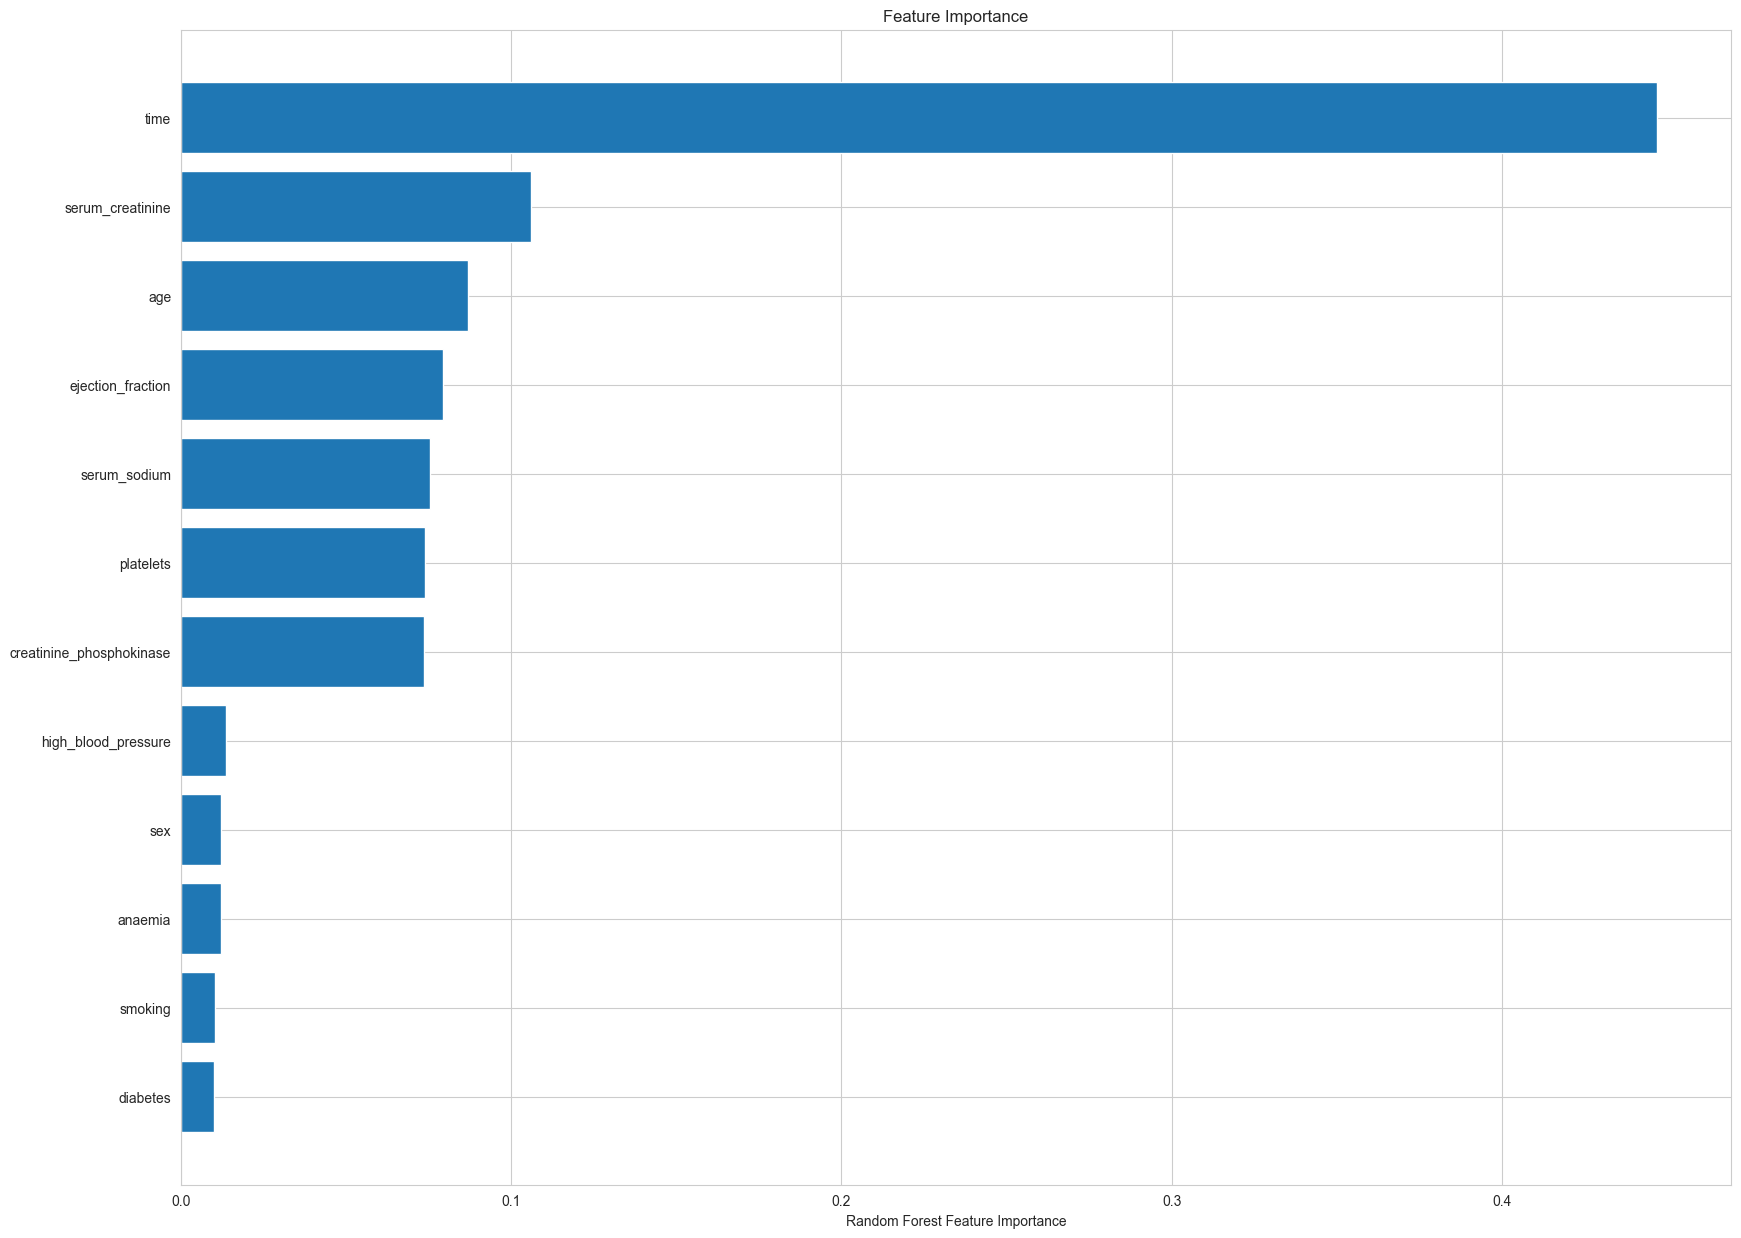

In [160]:
## Checking Feature importance 

plt.figure(figsize=(20,15))
importance = clf.feature_importances_
idxs = np.argsort(importance)
plt.title("Feature Importance")
plt.barh(range(len(idxs)),importance[idxs],align="center")
plt.yticks(range(len(idxs)),[feature_col_tree[i] for i in idxs])
plt.xlabel("Random Forest Feature Importance")
#plt.tight_layout()
plt.show()

## Using XGBoost Classifier
Just like in Random Forests, XGBoost uses Decision Trees as base learners:

However, the trees used by XGBoost are a bit different than traditional decision trees. They are called CART trees 
(Classification and Regression trees) and instead of containing a single decision in each “leaf” node, they contain real-value 
scores of whether an instance belongs to a group. After the tree reaches max depth, the decision can be made by converting the 
scores into categories using a certain threshold.

In [161]:
from xgboost import XGBClassifier
acc_XGB=[]
kf=model_selection.StratifiedKFold(n_splits=5)
for fold , (trn_,val_) in enumerate(kf.split(X=df_tree,y=y)):
    
    X_train=df_tree.loc[trn_,feature_col_tree]
    y_train=df_tree.loc[trn_,target]
    
    X_valid=df_tree.loc[val_,feature_col_tree]
    y_valid=df_tree.loc[val_,target]
    
    clf=XGBClassifier()
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_valid)
    print(f"The fold is : {fold} : ")
    print(classification_report(y_valid,y_pred))
    acc=roc_auc_score(y_valid,y_pred)
    acc_XGB.append(acc)
    print(f"The accuracy for {fold+1} : {acc}")

The fold is : 0 : 
              precision    recall  f1-score   support

           0       1.00      0.03      0.05        40
           1       0.34      1.00      0.51        20

    accuracy                           0.35        60
   macro avg       0.67      0.51      0.28        60
weighted avg       0.78      0.35      0.20        60

The accuracy for 1 : 0.5125
The fold is : 1 : 
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.59      0.68      0.63        19

    accuracy                           0.75        60
   macro avg       0.72      0.73      0.72        60
weighted avg       0.76      0.75      0.75        60

The accuracy for 2 : 0.7323491655969191
The fold is : 2 : 
              precision    recall  f1-score   support

           0       0.87      0.63      0.73        41
           1       0.50      0.79      0.61        19

    accuracy                           0.68        60
   

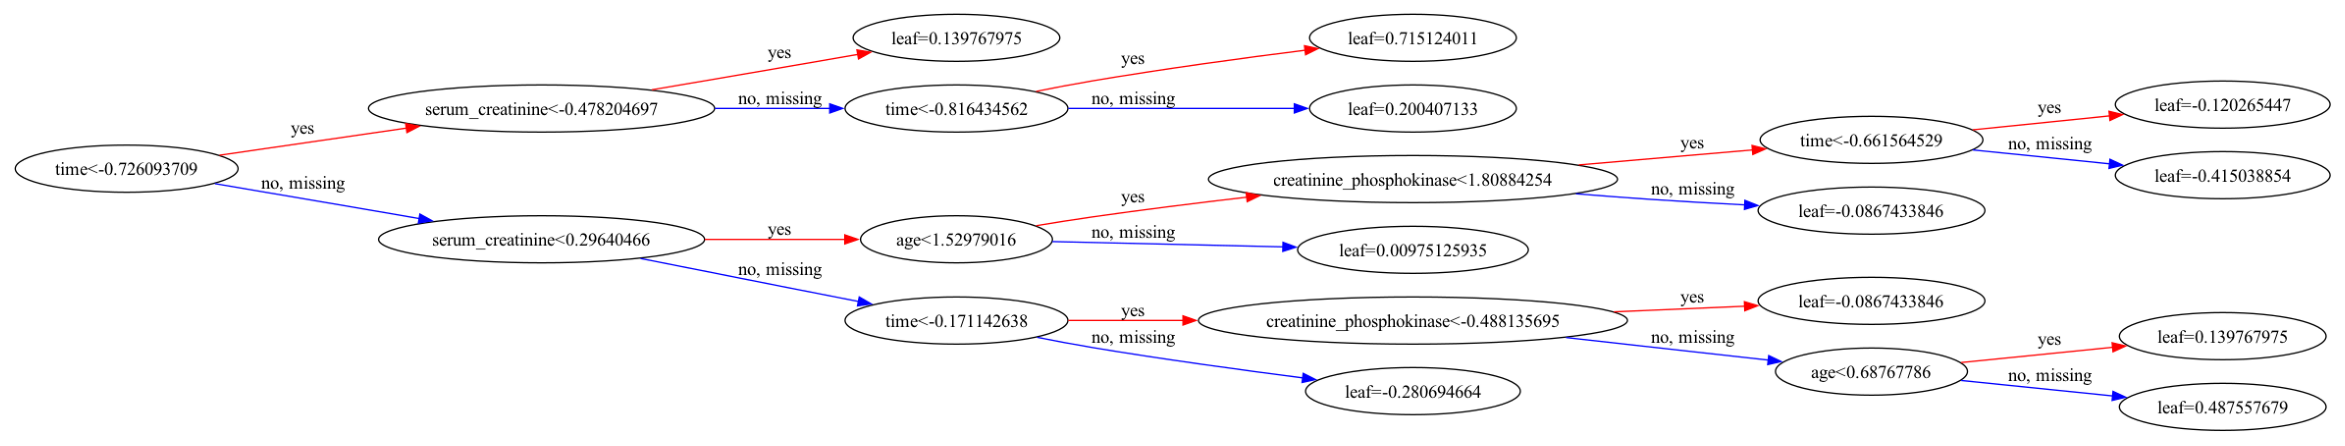

In [162]:
fig, ax = plt.subplots(figsize=(30, 30))
from xgboost import plot_tree
plot_tree(clf,num_trees=0,rankdir="LR",ax=ax)
plt.show()

In [76]:
# Feature selection using machine learning method: why this perform better than the logistic regression above? 

#import all the necessary libraries
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


#split the data into the training and the test set
#the independent features were already encoded, see above 

from sklearn.model_selection import train_test_split
X = norm_data.drop("DEATH_EVENT", axis=1)
y = norm_data["DEATH_EVENT"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)

# train simple linear regression
#choose a model

model = LogisticRegression()


#use RFE for feature selection
selector = RFE(model, n_features_to_select=5) #number of features is a adjustable 
selector = selector.fit(X_train, y_train)

#print the selected features
selected_features = X.columns[selector.support_]
print("Selected Features", selected_features)

#evaluate the model with selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

#print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with selected features: {accuracy:.4f}")

# Accuracy is 90% which is according to me just fine


Selected Features Index(['age', 'ejection_fraction', 'serum_creatinine', 'time', 'sex'], dtype='object')
Accuracy with selected features: 0.9000


In [77]:
# evaluate the model 
#train the model with the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 20, criterion = "entropy", random_state = 0)
model.fit(X_train_selected, y_train)
y_pred = model.predict(X_test_selected)

#Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with selecte features: {accuracy:.4f}")

Model Accuracy with selecte features: 0.8667


In [ ]:
# desribe the EDA findinds
# evalueate the model performance
# compare the models 
# find the reason why the models perform differently and poorly
# save the report in the text file
# make readme file with the description of the project
